In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
data_path = 'data'

data = pd.read_csv(os.path.join(data_path, 'gender_explicit_bias_updated.csv',))
data.set_index(pd.to_datetime(data['Time']), drop=True, inplace=True)
data.drop(columns=['Time'], inplace=True)
data.head()

,Explicit Gender-Career Bias
Time,
2017-01-01,0.901150
2017-02-01,0.840420
2017-03-01,0.847847
2017-04-01,0.911211
2017-05-01,0.887819


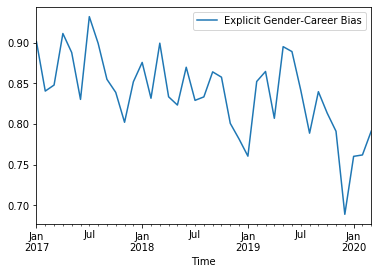

In [4]:
data.plot()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


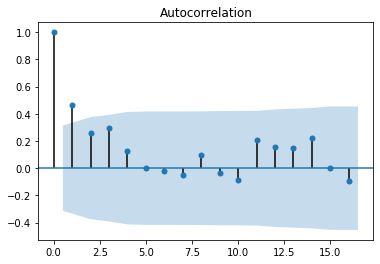

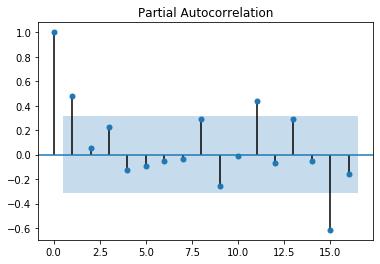

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()
plot_pacf(data)
plt.show()

In [6]:
year = ['2020'] * 8 + ['2021'] * 4
dom = ['20'] * 8 +  ['21'] * 4
index = []
for i in range(5,17):
    if i%12 == 0:
        month = 12
    else:
        month = i%12
    index.append(pd.to_datetime(f"{year[i-5]}-{month:02d}-{dom[i-5]}"))
    
index
test = pd.DataFrame(data=np.zeros(len(index)), columns=data.columns)
test.index = pd.Series(index, name='Time')
test

,Explicit Gender-Career Bias
Time,
2020-05-20,0.0
2020-06-20,0.0
2020-07-20,0.0
2020-08-20,0.0
2020-09-20,0.0
2020-10-20,0.0
2020-11-20,0.0
2020-12-20,0.0
2021-01-21,0.0


In [7]:
naive_pred = pd.DataFrame(np.repeat(data.mean().values, len(test)), columns=test.columns, index=test.index)
naive_pred

,Explicit Gender-Career Bias
Time,
2020-05-20,0.836946
2020-06-20,0.836946
2020-07-20,0.836946
2020-08-20,0.836946
2020-09-20,0.836946
2020-10-20,0.836946
2020-11-20,0.836946
2020-12-20,0.836946
2021-01-21,0.836946


In [8]:
y_hat = test.copy()

In [9]:
col='Explicit Gender-Career Bias'

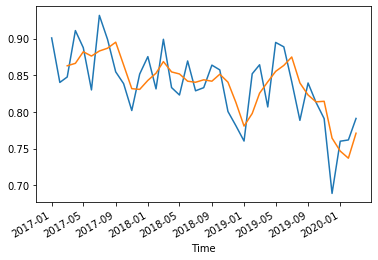

In [10]:
window_size=3
ax = plt.subplot(111)
plt.plot(data[col], label='Train')
data[col].rolling(window_size).mean().plot(ax=ax)
plt.show()
y_hat['naive_moving_average'] = np.repeat(data[col].rolling(window_size).mean().iloc[-1], len(y_hat))

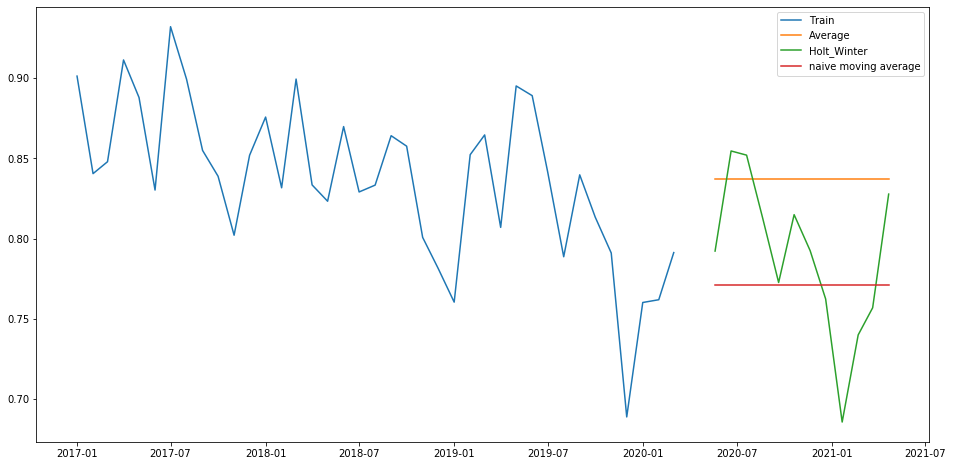

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_es = ExponentialSmoothing(np.asarray(data[col]) ,seasonal_periods=12 ,trend='add', seasonal='add', ).fit()
y_hat['Holt_Winter'] = fit_es.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(data[col], label='Train')
plt.plot(naive_pred[col], label='Average')
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter')
plt.plot(y_hat['naive_moving_average'], label='naive moving average')
plt.legend(loc='best')
plt.show()

In [13]:
sub_path = 'submission'
y_hat['Holt_Winter'].to_csv(os.path.join(sub_path, 'stage1_explicit_gender_bias.csv'))

In [154]:
# notes about the submission
# the holt winter is calculated for the first date of the month (becuase the train is like this)
# also the fact that month 4 of 2019 does not exist in the dataset was not taken into account!